# make_moons 함수를 활용한 데이터 생성: 임의의 데이터 셋 생성
make_moons 함수는 두개의 초승달 모양의 클러스터를 이루는 데이터를 생성한다. 이렇게 만들어진 데이터는 직선을 사용하여 분류할 수 없다.
### 해당 함수의 인수(p.66)
1) n_samples: 표본 데이터 수, 기본 100

2) shuffle: 샘플의 셔플 여부, 기본 참

3) noise: 잡음의 크기(0이면 정확히 반원을 이룬다.

4) random_state: 데이터셋의 랜덤 생성 개수

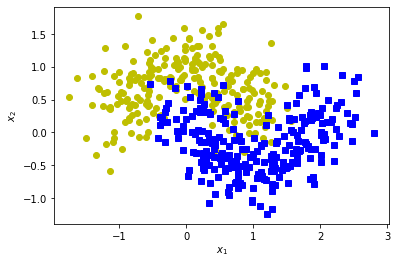

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# 표본의 개수는 500개 잡음은 0.3, 데이터 셋의 랜덤 생성 개수는 42개
x,y=make_moons(n_samples=500,noise=0.30,random_state=42)
plt.plot(x[:,0][y==0],x[:,1][y==0],"yo") # 종속변수가 0인 점의 좌표를 노란색으로 점 표시
# x[:,0]-->x1, x[:,1]-->x2 의 값들을 차례로 적어넣은 것
plt.plot(x[:,0][y==1],x[:,1][y==1],"bs") # 종속변수가 1인 점의 좌표를 파란색으로 점 표시
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()
# 두개의 독립변수에 따라 종속변수가 0일때와 1일때의 분포가 확연히 다름.
# 이체 이 친구들을 구분해주는 선을 찾으로 가야 함.

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
# 총 42개의 랜덤 데이터 셋을 생성하고, 각각을 train과 testset으로 나눔.

# 앙상블(학습 데이터의 변형)
### bagging algorithm: 다른 학습데이터, 같은 알고리즘(서로 다른 모수를 선택 or 서로 다른 입력 변수를 사용) 
학습 데이터 x로부터 n개의 sample을 복원 추출(비복원이면 데이터가 서로 독립적이지 않음), unstable learner(학습 모델)의 분산을 감소시킴으로 전체적인 오차를 감소.

단점: 너무 단순하지 않음?

### boosting algorithm: 앞서서 분류가 더 잘 안되는 데이터를 대상으로 데이터 조작. 

1) 데이터 반영 측면: 전 모델에서 학습이 잘 되지 않은 데이터를 다음 모델에 더욱더 많이 반영(가중치 두기)

2) 성적이 더 높은 모델을 최종 결과에 더 반영(가중치)

strong learner: 

weak learner: 무작위 선택보다 더 우수한 정확도의 모델을 생성
: 학습 정확도가 50%만 넘으면 해당 모델 선정. (차피 여러개 모델 선정할 것이기 때문에 정확도 낮아도 됨. 오류 상괘효과)

인수 종류

1) n_samples: 표본 데이터의 수, default 100

2) shuffle: 샘플의 셔플 여부, default true

3) noise: 잡음의 크기(0이면 반원을 이룸)

4) random_state: 데이터셋의 랜덤 생성 수

In [6]:
# 배깅 알고리즘 모형
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# 데이터셋 개수: 42개, 트리의 개수: 500, 최대표본의 수: 100개
# 총 학습 데이터에서 표본 100개(max_samples)를 기준으로 42개의 표본(random_state=42)을 추출하고, 
# 500개의 트리(n-estimators)에 또 다시 랜덤으로 적용
bag_clf=BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,max_samples=100,bootstrap=True,
n_jobs=-1,random_state=42)
bag_clf.fit(x_train,y_train)
y_pred=bag_clf.predict(x_test)

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.904


In [8]:
# 일반 결정트리 모형
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train,y_train)
y_pred_tree=tree_clf.predict(x_test)
print(accuracy_score(y_test,y_pred_tree))
# bagging ensemble이 단일 decision tree보다 더 잘 분류했다.

0.856


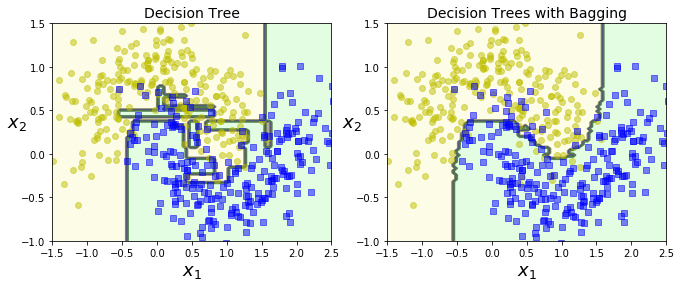

In [17]:
# 단일 decision tree와 bagging Ensemble의 비교를 위하여 Decision Boundaary를 표시하는 새로운 함수를 정의
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,x,y,axes=[-1.5,2.5,-1,1.5],alpha=0.5,contour=True):
    x1s=np.linspace(axes[0],axes[1],100) # axes[0]과 axes[1]사이에 점을 100개를 생성
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2=np.meshgrid(x1s,x2s) # 좌표평면 생성.
    x_new=np.c_[x1.ravel(),x2.ravel()] # 두개의 1차원 배열을 column으로 세워서 2차원 배열 만들기
    y_pred=clf.predict(x_new).reshape(x1.shape) # 예측치를 x1길이 만큼 다차원 배열로 만들기
    custom_cmap=ListedColormap(["#fafab0","#4c4c7f","#a0faa0"])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    if contour:
        custom_cmap2=ListedColormap(["#7d7d58","#4c4c7f","#507d50"])
        plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)
    plt.plot(x[:,0][y==0],x[:,1][y==0],"yo",alpha=alpha)
    plt.plot(x[:,0][y==1],x[:,1][y==1],"bs",alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$",fontsize=18)
    plt.ylabel(r"$x_2$",fontsize=18,rotation=0)
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf,x,y)# decision boundary식을 단일 모형에 적용
plt.title("Decision Tree",fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf,x,y)
plt.title("Decision Trees with Bagging",fontsize=14)
plt.show()
    

# Adaboost

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf=AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1),n_estimators=200,algorithm="SAMME.R",learning_rate=0.5,random_state=42)
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

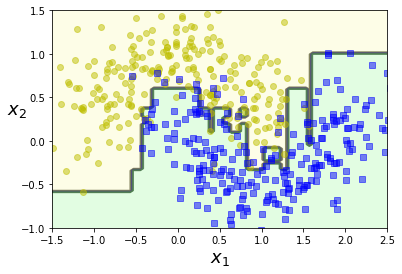

In [19]:
plot_decision_boundary(ada_clf,x,y)

In [20]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(splitter="random",max_leaf_nodes=16,random_state=42),n_estimators=500,max_samples=1.0,bootstrap=True,n_jobs=-1,random_state=42)
bag_clf.fit(x_train,y_train)
y_pred=bag_clf.predict(x_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,random_state=42)
rnd_clf.fit(x_train,y_train)
y_pred_rf=rnd_clf.predict(x_test)

In [30]:
print(accuracy_score(y_test,y_pred))

0.92


In [31]:
print(accuracy_score(y_test,y_pred_rf))

0.912


In [32]:
np.sum(y_pred==y_pred_rf)/len(y_pred)

0.976

In [35]:
# 변수 중요도까지 도출 가능하다.
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)
rnd_clf.fit(iris["data"],iris["target"])
for name,score in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682
